https://youtu.be/kK6VVgk3tbY?si=GdRaz3JGukCFMnUl

In [1]:
import os
import requests
import pprint
import tkinter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\81908\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\81908\AppData\Local\Temp\ipykernel_10368\181567587.py", line 31, in display_graph
    daily_data = dict(reversed(data['Time Series (Daily)'].items()))
                               ^^^^
NameError: name 'data' is not defined


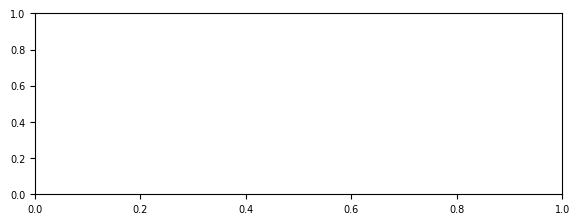

In [2]:
class Application(tkinter.Frame):
    def __init__(self, root=None):
        super().__init__(root,width=680,height=280)
        self.root = root
        self.pack()
        self.pack_propagate(0)
        self.create_widgets()

    def create_widgets(self):
        self.text_box = tkinter.Entry(self)
        self.text_box['width'] = 10
        self.text_box.pack()

        submit_btn = tkinter.Button(self)
        submit_btn['text'] = '実行'
        submit_btn['command'] = self.display_graph
        submit_btn.pack()

        plt.rcParams['font.size'] = 7
        self.fig, ax = plt.subplots(figsize=(12,4))
        self.canvas = FigureCanvasTkAgg(self.fig, master=self)
        self.canvas.get_tk_widget().pack()

    def display_graph(self):
        symbol = self.text_box.get()
        api_key = 'UL3Q0I9V3E58KMSI'
        url = 'https://www.alphavantage.co/query?' \
        f'function=TIME_SERIES_DAILY&symbol=MSFT&apikey={api_key}'
        response = requests.get(url).json()

        daily_data = dict(reversed(data['Time Series (Daily)'].items()))
        date_list = daily_data.keys()
        close_list = [float(x['4. close']) for x in daily_data.values()]

        self.ax.clear()
        self.ax.plot(date_list, close_list)
        self.ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
        self.ax.grid()
        self.canvas.draw()

def main():
    root = tkinter.Tk()
    root.title('株価チャートアプリ')
    root.geometry('700x300')
    app = Application(root=root)
    app.mainloop()

if __name__ == '__main__':
    main()